In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [2]:
# Dataset: MNIST
from tensorflow.keras.datasets import mnist
print("[INFO] loading MNIST into memory")
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

[INFO] loading MNIST into memory
11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# read your own data
# import cv2

In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


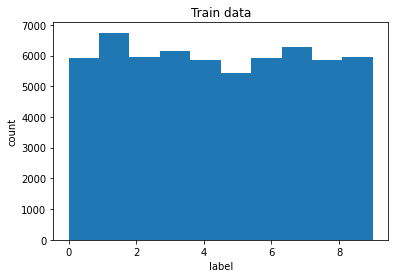

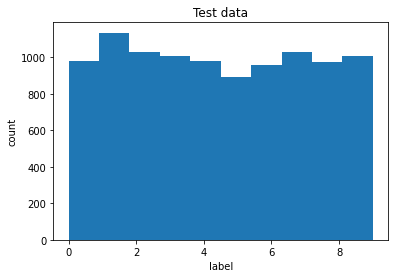

In [ ]:
# distribution of train images and test images
plt.figure(1)
plt.hist(train_labels, bins=10)
plt.title('Train data')
plt.xlabel('label')
plt.ylabel('count')


plt.figure(2)
plt.hist(test_labels, bins=10)
plt.title('Test data')
plt.xlabel('label')
plt.ylabel('count')

plt.show()

In [4]:
# MINIST image height, width and channel
myHeight = 28
myWidth = 28
myChannel = 1  # gray scale images
myInputShape = (myHeight, myWidth, myChannel)
myNClass = 10
myClasses = ['0','1','2','3','4','5','6','7','8','9']

In [5]:
# convert the labels from integers to one hot vectors
from sklearn.preprocessing import LabelBinarizer
lblbin = LabelBinarizer()
train_labels_onehot = lblbin.fit_transform(train_labels)
test_labels_onehot = lblbin.transform(test_labels)

In [6]:
# reshape the data
train_data = train_images.reshape((train_images.shape[0], myHeight, myWidth, myChannel))
test_data = test_images.reshape((test_images.shape[0], myHeight, myWidth, myChannel))

In [7]:
# scale data to the range of [0, 1]
train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0

In [8]:
# initialize our training model
# our network is LeNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
model = Sequential()
# first convolution: CONV => RELU => POOL
model.add(Conv2D(20, (5, 5), padding="same", input_shape=myInputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second convolution: CONV => RELU => POOL
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully connected layer:  FC => RELU 
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# Classifier:  softmax
model.add(Dense(myNClass))
model.add(Activation("softmax"))

In [9]:
print( model.summary() )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                    

In [13]:
# initialize the optimizer and compile our model
from tensorflow.keras.optimizers import SGD
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# train the network
print("[INFO] training network...")
EPOCHS = 20
BS = 128
H = model.fit(train_data, train_labels_onehot, validation_data=(test_data, test_labels_onehot), batch_size=BS,epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/20
469/469 [==============================] - 109s 233ms/step - loss: 0.1658 - accuracy: 0.9512 - val_loss: 0.1296 - val_accuracy: 0.9634
Epoch 2/20
469/469 [==============================] - 109s 232ms/step - loss: 0.1323 - accuracy: 0.9606 - val_loss: 0.1078 - val_accuracy: 0.9682
Epoch 3/20
469/469 [==============================] - 108s 231ms/step - loss: 0.1096 - accuracy: 0.9675 - val_loss: 0.1012 - val_accuracy: 0.9673
Epoch 4/20
469/469 [==============================] - 107s 229ms/step - loss: 0.0962 - accuracy: 0.9710 - val_loss: 0.0860 - val_accuracy: 0.9732
Epoch 5/20
469/469 [==============================] - 108s 231ms/step - loss: 0.0850 - accuracy: 0.9746 - val_loss: 0.0772 - val_accuracy: 0.9753
Epoch 6/20
469/469 [==============================] - 108s 231ms/step - loss: 0.0765 - accuracy: 0.9771 - val_loss: 0.0665 - val_accuracy: 0.9792
Epoch 7/20
469/469 [==============================] - 109s 233ms/step - loss: 0.0703 - accuracy: 

In [ ]:
# evaluate the trained model from test data
print("[INFO] evaluating network...")
[test_loss, test_acc] = model.evaluate(test_data, test_labels_onehot, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

[INFO] evaluating network...
Evaluation result on Test Data : Loss = 0.04888039082288742, accuracy = 0.983299970626831


In [ ]:
# statistic report of the trained model from test data group by each class
from sklearn.metrics import classification_report
predictions = model.predict(test_data)
# classification_report(Ground true, prediction, class names)
print(classification_report(test_labels, predictions.argmax(axis=1),target_names=myClasses))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.94      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



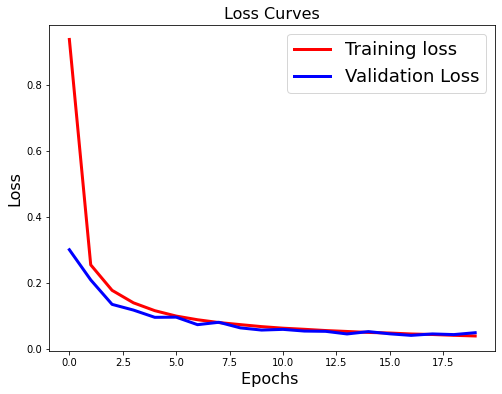

In [ ]:
# plot loss curves
plt.figure(figsize=[8,6])
plt.plot(H.history['loss'],'r',linewidth=3.0)
plt.plot(H.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig('loss.png')
plt.show()

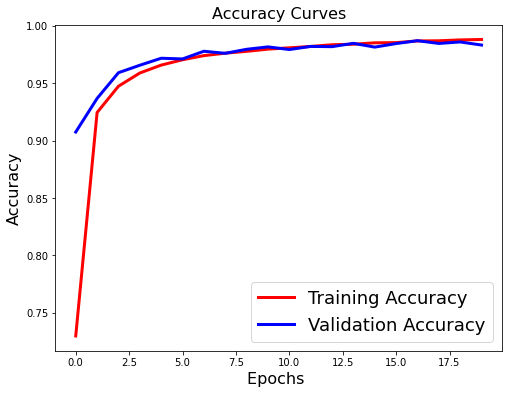

In [ ]:
# plot accuracy curves
plt.figure(figsize=[8,6])
plt.plot(H.history['accuracy'],'r',linewidth=3.0)
plt.plot(H.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.savefig('acc.png')
plt.show()

In [ ]:
model.save('mnist_lenet_epoch20.h5')